***

# Principal Component Analysis

Author: Olatomiwa Bifarin. <br>
PhD Candidate Biochemistry and Molecular Biology <br>
@ The University of Georgia

_This is a draft copy, a work in progress_

## Notebook Content

1. [Background](#1) <br>
2. [Mathematical Descriptions](#2) <br>
3. [Computations](#3) <br>
4. [Examples](#4)

In [2]:
# More sharp and legible graphics
%config InlineBackend.figure_format = 'retina'

## Background
<a id="1"></a>

Given that $n$ is the number of samples and $p$ is the number of features; not until recently humans had not have the opportunity to generate dataset where $p>>n$. In other words, we have always had (structured) dataset with _many_ samples but fewer features. High dimensional datasets as they are called - as expected - are immune to traditional statistical treatments, as such spurning the innovation of `dimensionality reduction` techniques. It is one of the popular methods that we will speak to in this short notebook: principal compenent analysis.  

In short, it involves projecting $p$ dimensional variables into $M$-dimensional subspace. Just think about it. 

All we want to do here is to transform a $p$ dimensional feature space into a lower dimensional space, and guess what? We want to do all these without losing (much) information. 

Here is an illustration:

<img align='center' src='datasets/pca/pca.png' width=50%/>

Take the illustration above. Notice the almost perfect correlation between $X_{1}$ and $X_{2}$, which suggest informational redundacy. And what will we do if we want to engage in some sort of dimensionality reduction exercise? We project the 2-dimensional feature space (**fig** A) into one (**fig** B), and still retain the information we need: variation among the datapoints!

In summary, the aim of PCA is to transform a high dimensional dataset containing potentially correlated features into a small(er) number of uncorrelated features that we will call `principal compenents`

## Mathematical Description
<a id="2"></a>

Given a vector $X$: 

$$ \large X = (x_{1},...x_{p})'$$

We define the variance-covariance matrix of $X$ as the following:

$$ \large var(X) = \sum = \begin{bmatrix}
  \sigma_{1} & \cdots & \cdots & \sigma_{p1}\\
  \vdots & \vdots & \ddots & \vdots \\
  \sigma_{1p} & \cdots &  \cdots & \sigma_{p}^{2}\\
\end{bmatrix} \in \mathbb{R}^{pxp}$$

Now, let's define a series of $Y$ as a linear combinations of $x$ and coefficients $e_{i}$: 

$$ \large Y_{1} = e_{11}x_{1}+e_{12}x_{2}+...+e_{1p}x_{p}$$
$$ \large Y_{2} = e_{21}x_{1}+e_{22}x_{2}+...+e_{2p}x_{p}$$
$$ \large \vdots$$
$$ \large Y_{p} = e_{p1}x_{1}+e_{p2}x_{2}+...+e_{pp}x_{p}$$

These linear combinations can be thought of as linear regression minus the intercept(bias) term. As such, as stated earlier, $e_{i}$ is the coefficients.  

In turn, we can define a covariance matrix of $Y$ as the following: 

$$ var(Y_{i}) = \textbf e_{i}^{'}\sum \textbf e_{i}^{'}$$

The next mathematical goal is to ask what linear combination of $e_{i}$ maximizes the variance of $Y_{i}.$
The answer to that is that the first principal component is the linear combination that maximizes the variance - accounting for the highest amount of variance as possible in the dataset. The coefficient will be defined as such: $e_{1} = (e_{11},...,e_{1p})'$. 

Next, we look for the next set of $e_{2}$ that maximizes the variance of $Y_{2}$ (the maximum amount of variance remaining) with the constraint that $cov(Y_{1},Y_{2})=0$ i.e. $Y_{1}$ and $Y_{2}$ are uncorrelated. 

And then the cycles continue. 

It seems those coefficients $e_{i}$ holds the key to the solution of our problem. And I do we determine these coefficients? -- `eigenvectors.` 

> If $B$ is a square matrix, a non-zero vector $v$ is an eigenvector of $B$ if there is a scalar eigenvalue (λ) such that: $Bv = \lambda v $

It turns out that the solution of the coefficient can be derived via the eigen decomposition of the variance-covariance matrix $\sum $ where $\lambda_{i}$ is the eigen value, and $e_{i}$ is the eigen vector. Such that: 

$$ \large \sum v = \lambda v $$ 

with eigen values
$$ \large \lambda_{1} \geq \lambda_{2}, ..., \lambda_{p} $$
and  corresponding eigen vectors. 
$$ \large e_{1}, e_{2}, ..., e_{p}$$

Finally, the variance of $Y_{i}$, that is the $i$-th principal component is equal to the $i$-th $\lambda$:

$$ var(Y_{i}) = \lambda_{i} = var(Y_{1} = e_{i1}x_{1}+e_{i2}x_{2}+...+e_{ip}x_{p}) $$

## Computations
<a id="3"></a>

### Dataset 

In this session, I will be clustering a breast cancer dataset consisting of benign and metastatic data based on the features extracted from the cell nuclei characteristics in the histological images.

Data description link: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

In [3]:
# Lets import the  breast cancer wisconsin dataset[link]
from sklearn.datasets import load_breast_cancer
import pandas as pd
data = load_breast_cancer()
X = data["data"]
y = data["target"]
feature_names = data["feature_names"]

df = pd.DataFrame(data=X, columns=feature_names)
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
X = df.values
print('Dimension of the dataset:\n', X.shape)
print('dataset:\n', X)

Dimension of the dataset:
 (569, 30)
dataset:
 [[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


_Standardize datasets_

$$z = \large \frac {x-u}{s}$$

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

print('Dimension of the dataset:\n', X_std.shape)
print('dataset:\n', X_std)

Dimension of the dataset:
 (569, 30)
dataset:
 [[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


### _p_-dimensional mean vector

In [6]:
mean_vec = scaler.mean_
print('Dimension of the mean vector:\n', mean_vec.shape)
print('dataset:\n', mean_vec)

Dimension of the mean vector:
 (30,)
dataset:
 [1.41272917e+01 1.92896485e+01 9.19690334e+01 6.54889104e+02
 9.63602812e-02 1.04340984e-01 8.87993158e-02 4.89191459e-02
 1.81161863e-01 6.27976098e-02 4.05172056e-01 1.21685343e+00
 2.86605923e+00 4.03370791e+01 7.04097891e-03 2.54781388e-02
 3.18937163e-02 1.17961371e-02 2.05422988e-02 3.79490387e-03
 1.62691898e+01 2.56772232e+01 1.07261213e+02 8.80583128e+02
 1.32368594e-01 2.54265044e-01 2.72188483e-01 1.14606223e-01
 2.90075571e-01 8.39458172e-02]


### Variance-Covariance Matrix

In [7]:
import numpy as np
cov_mat = np.cov(X_std.T)
print('Dimension of variance-covariance matrix:\n', cov_mat.shape)
#print('dataset:\n', cov_mat);

Dimension of variance-covariance matrix:
 (30, 30)


### Eigen Decomposition

In [8]:
# Eigen Decomposition
e_val, e_vec = np.linalg.eig(cov_mat)

print('Dimension of eigen value vector:', e_val.shape)
print('Dimension of eigen vector matrix:', e_vec.shape)
# print('Eigenvectors \n%s' %eig_vecs)
# print('\nEigenvalues \n%s' %eig_vals)

Dimension of eigen value vector: (30,)
Dimension of eigen vector matrix: (30, 30)


Recall that the eigenvectors with the lowest eigenvalues bear the least information about the data summary; Therefor in order to select the principal components we want, we will rank the eigenvalues from highest to lowest in order choose the top `𝑘` eigenvectors.

In [9]:
e_val

array([1.33049908e+01, 5.70137460e+00, 2.82291016e+00, 1.98412752e+00,
       1.65163324e+00, 1.20948224e+00, 6.76408882e-01, 4.77456255e-01,
       4.17628782e-01, 3.51310875e-01, 2.94433153e-01, 2.61621161e-01,
       2.41782421e-01, 1.57286149e-01, 9.43006956e-02, 8.00034045e-02,
       5.95036135e-02, 5.27114222e-02, 4.95647002e-02, 1.33279057e-04,
       7.50121413e-04, 1.59213600e-03, 6.91261258e-03, 8.19203712e-03,
       1.55085271e-02, 1.80867940e-02, 2.43836914e-02, 2.74877113e-02,
       3.12142606e-02, 3.00256631e-02])

In [10]:
e_vec

array([[ 2.18902444e-01, -2.33857132e-01, -8.53124284e-03,
         4.14089623e-02, -3.77863538e-02,  1.87407904e-02,
         1.24088340e-01,  7.45229622e-03, -2.23109764e-01,
         9.54864432e-02,  4.14714866e-02,  5.10674568e-02,
         1.19672116e-02, -5.95061348e-02, -5.11187749e-02,
         1.50583883e-01, -2.02924255e-01, -1.46712338e-01,
        -2.25384659e-01, -7.02414091e-01,  2.11460455e-01,
        -2.11194013e-01, -1.31526670e-01,  1.29476396e-01,
         1.92264989e-02, -1.82579441e-01,  9.85526942e-02,
        -7.29289034e-02, -4.96986642e-02,  6.85700057e-02],
       [ 1.03724578e-01, -5.97060883e-02,  6.45499033e-02,
        -6.03050001e-01,  4.94688505e-02, -3.21788366e-02,
        -1.13995382e-02, -1.30674825e-01,  1.12699390e-01,
         2.40934066e-01, -3.02243402e-01,  2.54896423e-01,
         2.03461333e-01,  2.15600995e-02, -1.07922421e-01,
         1.57841960e-01,  3.87061187e-02,  4.11029851e-02,
        -2.97886446e-02, -2.73661018e-04, -1.05339342e-

In [11]:
e_val = list(e_val)
e_val.sort(reverse=True)


print ('Eigenvalues in descending order:')
for i in e_val:
    print(round(i, 2))

Eigenvalues in descending order:
13.3
5.7
2.82
1.98
1.65
1.21
0.68
0.48
0.42
0.35
0.29
0.26
0.24
0.16
0.09
0.08
0.06
0.05
0.05
0.03
0.03
0.03
0.02
0.02
0.02
0.01
0.01
0.0
0.0
0.0


Now let's visualize the percentage of variance by each of the component:

In [12]:
tot = sum(e_val)
var_exp = [(i / tot)*100 for i in sorted(e_val, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

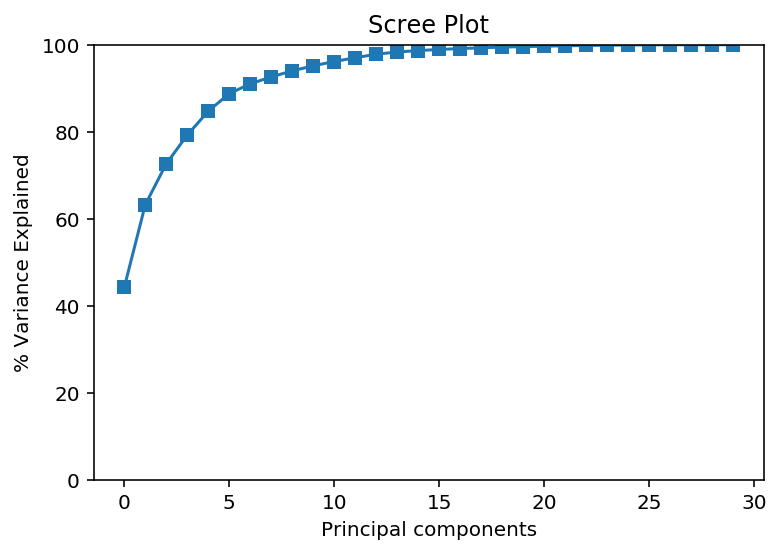

In [13]:
import matplotlib.pyplot as plt

plt.ylabel('% Variance Explained')
plt.xlabel('Principal components')
plt.title('Scree Plot')
#plt.xlim(1,30)
plt.ylim(0,100)
plt.style.context('seaborn-whitegrid')

plt.plot(cum_var_exp, marker='s');

Now, let's take a closer look:

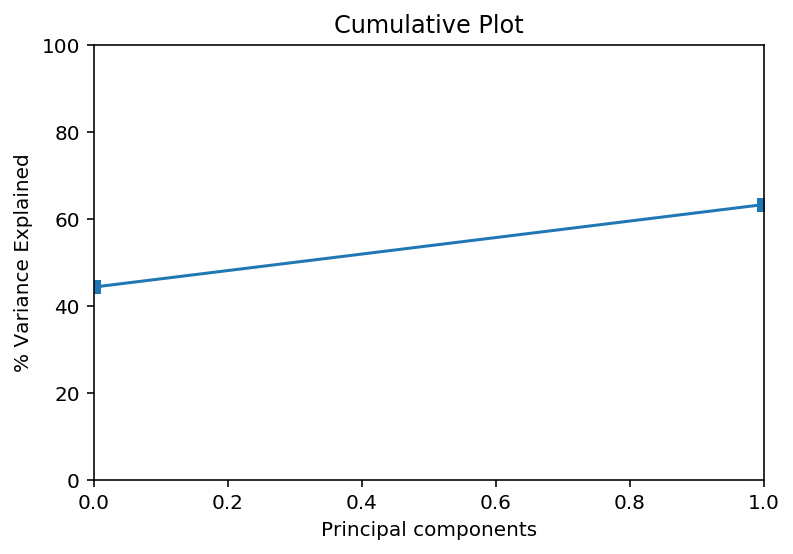

In [39]:
plt.ylabel('% Variance Explained')
plt.xlabel('Principal components')
plt.title('Cumulative Plot')
plt.xlim(0,1)
plt.ylim(0,100)
plt.style.context('seaborn-whitegrid')

plt.plot(cum_var_exp, marker='s');

Here, we see that the first 2 components explains ~60% of the variation in the dataset.

Finally, let's use the sklearn to visualize our results.

## Examples
<a id="4"></a>

In [40]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
X_reduced = pca.fit_transform(X_std)

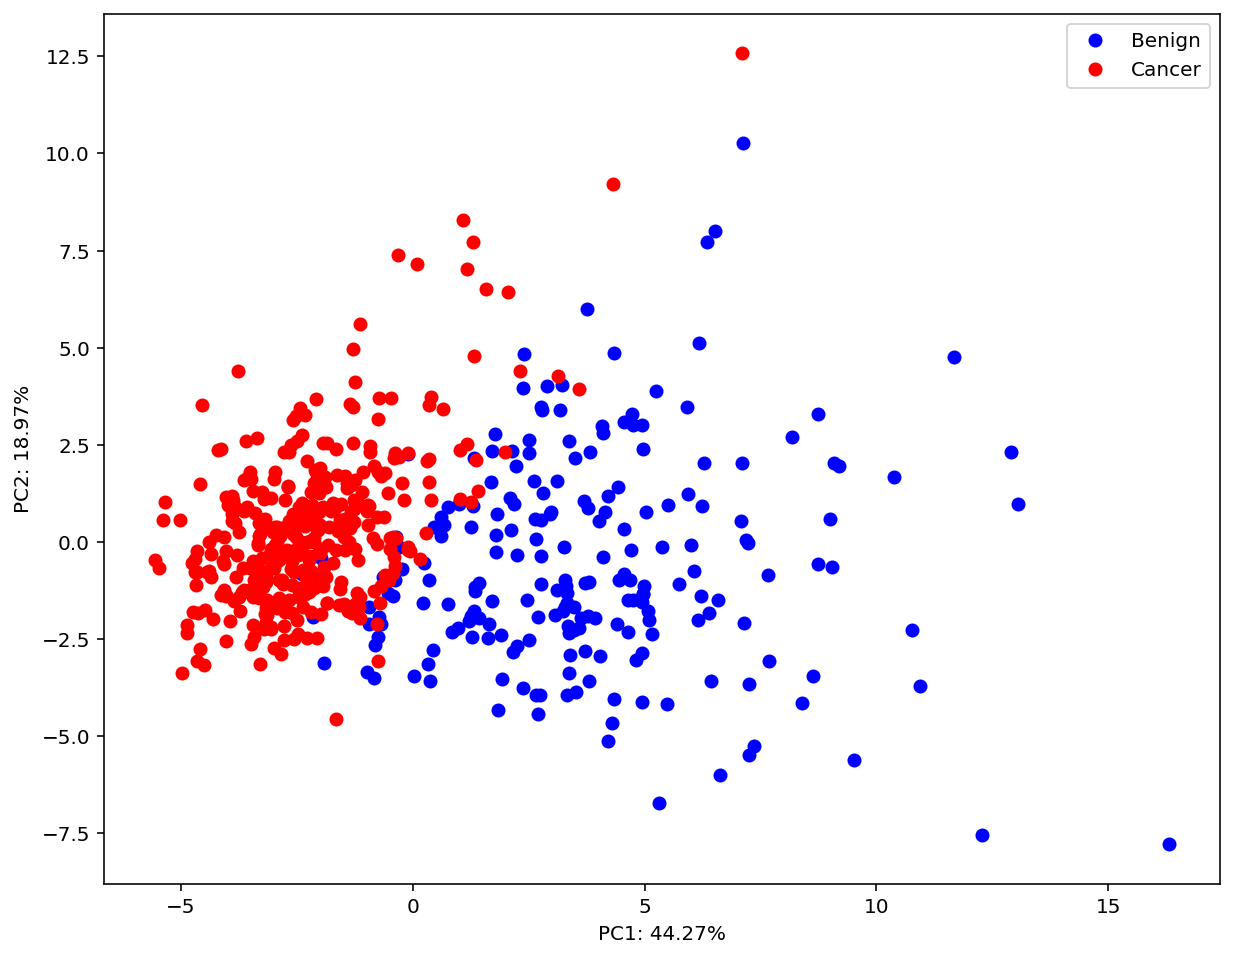

In [46]:
Var = pca.explained_variance_ratio_ # returns variance ratio of the selected component. 
plt.figure(figsize=(10,8))
plt.plot(X_reduced[y == 0, 0], X_reduced[y == 0, 1], 'bo', label='Benign');
plt.plot(X_reduced[y == 1, 0], X_reduced[y == 1, 1], 'ro', label='Cancer');
plt.xlabel("PC1: " + str(round(Var[0]*100, 2)) + "%");
plt.ylabel("PC2: " + str(round(Var[1]*100, 2))+ "%");
plt.legend(loc=0);


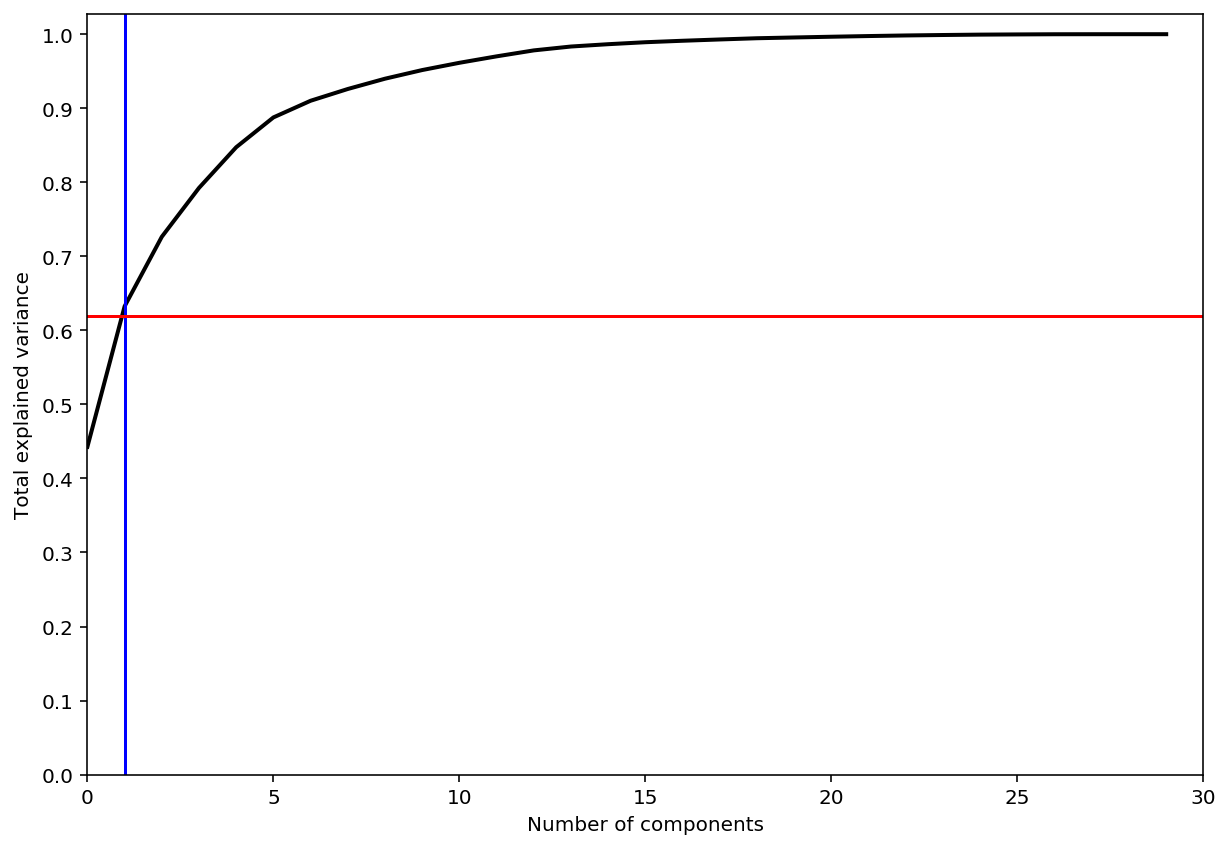

In [45]:
pca = decomposition.PCA()
X_reduced = pca.fit_transform(X_std)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 30)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(1, c='b')
plt.axhline(0.62, c='r')
plt.show();

As shown above ~60% variation in the dataset is captured in this 2D PCA plot. 

## Resources and References

- Wikipedia, __[Principal Component Analysis](https://en.wikipedia.org/wiki/Principal_component_analysis)__
- Penn State, Department of Statistics: STAT 505 Applied Multivariate Statistical Analysis. __[Lesson 11: PCA](https://online.stat.psu.edu/stat505/lesson/11/11.2)__
- Sebastian Raschka, __[Implementing a Principal Component Analysis (PCA)](https://sebastianraschka.com/Articles/2014_pca_step_by_step.html)__